In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [117]:
df_e = pd.read_csv("../crawling/ediyalocation.csv").drop(["Unnamed: 0"], axis=1)
df_s = pd.read_csv("../crawling/starbuckslocation.csv").drop(["Unnamed: 0"], axis=1)
df_t = pd.read_csv("../crawling/subwaylocation.csv").drop(["Unnamed: 0"], axis=1)

In [118]:
import math
from haversine import haversine

def distance(lat1, lng1, lat2, lng2):
    """lat=위도, lng=경도"""
    # x = (math.cos(lat1)*6400*2*math.pi/360)*abs(lng1-lng2)
    # y = 111*abs(lat1-lat2)
    return haversine((lat1, lng1), (lat2, lng2), unit = 'km')

In [121]:
df_s.Addr = df_s.Addr.apply(lambda x: x.split()[1])
df_e.Addr = df_e.Addr.apply(lambda x: x.split()[1])

In [124]:
nearest_ediya = []
nearest_ediya_dist = []
nearest_ediya_lat = []
nearest_ediya_lng = []
nearest_subway = []
nearest_subway_dist = []
nearest_subway_lat = []
nearest_subway_lng = []

for i in range(len(df_s)): # len(df_s)
    name = df_s.Name[i]
    lat1, lng1 = df_s.iloc[i][2:]
    
    # 이디야
    min_dist = 1000
    min_name = ''
    min_lat, min_lng = (0, 0)
    for j in range(len(df_e)):
        lat2, lng2 = df_e.iloc[j][2:]
        d = distance(lat1, lng1, lat2, lng2)
        if d < min_dist:
            min_name = df_e.Name[j]
            min_lat, min_lng = (lat2, lng2)
            min_dist = d
    nearest_ediya.append(min_name)
    nearest_ediya_dist.append(min_dist)
    nearest_ediya_lat.append(min_lat)
    nearest_ediya_lng.append(min_lng)

    # 지하철역
    min_dist = 1000
    min_name = ''
    min_lat, min_lng = (0, 0)
    for j in range(len(df_t)):
        lat2, lng2 = df_t.iloc[j][2:]
        d = distance(lat1, lng1, lat2, lng2)
        if d < min_dist:
            min_name = df_t.Name[j]
            min_lat, min_lng = (lat2, lng2)
            min_dist = d
    nearest_subway.append(min_name)
    nearest_subway_dist.append(min_dist)
    nearest_subway_lat.append(min_lat)
    nearest_subway_lng.append(min_lng)
    


In [125]:
df = pd.DataFrame([nearest_ediya, nearest_ediya_dist, nearest_subway, nearest_subway_dist]).transpose()
df.columns = ["ediya", 'distEdiya', 'subway', 'distSubway']
df = pd.concat([df_s.Name, df_s.Addr, df], axis=1)

In [127]:
df.to_csv('starbucks.csv', index=False)
# df

In [129]:
nearest_subway = []
nearest_subway_dist = []
nearest_subway_lat = []
nearest_subway_lng = []

for i in range(len(df_e)): # len(df_s)
    name = df_e.Name[i]
    lat1, lng1 = df_e.iloc[i][2:]
    
    # 지하철역
    min_dist = 1000
    min_name = ''
    min_lat, min_lng = (0, 0)
    for j in range(len(df_t)):
        lat2, lng2 = df_t.iloc[j][2:]
        d = distance(lat1, lng1, lat2, lng2)
        if d < min_dist:
            min_name = df_t.Name[j]
            min_lat, min_lng = (lat2, lng2)
            min_dist = d
    nearest_subway.append(min_name)
    nearest_subway_dist.append(min_dist)
    nearest_subway_lat.append(min_lat)
    nearest_subway_lng.append(min_lng)

In [130]:
df = pd.DataFrame([nearest_subway, nearest_subway_dist]).transpose()
df.columns = ['subway', 'distSubway']
df = pd.concat([df_e.Name, df_e.Addr, df], axis=1)

df.to_csv('ediya.csv', index=False)

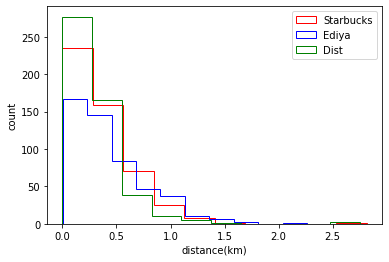

In [141]:
# 스타벅스와 지하철 사이 거리의 분포
df1 = pd.read_csv('starbucks.csv')
plt.hist(df1.distSubway, histtype='step', label='Starbucks', color='red')

# 이디야와 지하철 사이 거리의 분포
df2 = pd.read_csv('ediya.csv')
plt.hist(df2.distSubway, histtype='step', label='Ediya', color='b')

# 이디야와 스타벅스 사이 거리의 분포
plt.hist(df1.distEdiya, histtype='step', label='Dist', color='green')

plt.xlabel("distance(km)")
plt.ylabel("count")
plt.legend()
plt.show()

In [165]:
import matplotlib as mpl
from matplotlib import font_manager, rc

print ('버전: ', mpl.__version__)
print ('설정 위치: ', mpl.matplotlib_fname())
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())
print([(f.name, f.fname) for f in font_manager.fontManager.ttflist if 'D2Coding' in f.name])

path = '/home/alllhvhla/.local/share/fonts/D2Coding/D2CodingBold-Ver1.3.2-20180524.ttf'
font_name = font_manager.FontProperties(fname = path, size = 10).get_name()
rc('font', family = font_name)
plt.rcParams['axes.unicode_minus'] = False

버전:  3.4.3
설정 위치:  /home/alllhvhla/.local/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc
설치 위치:  /home/alllhvhla/.local/lib/python3.9/site-packages/matplotlib/__init__.py
설정 위치:  /home/alllhvhla/.config/matplotlib
캐시 위치:  /home/alllhvhla/.cache/matplotlib
[('D2Coding', '/home/alllhvhla/.local/share/fonts/D2Coding/D2CodingBold-Ver1.3.2-20180524.ttf'), ('D2Coding', '/home/alllhvhla/.local/share/fonts/D2Coding/D2Coding-Ver1.3.2-20180524.ttf'), ('D2Coding ligature', '/home/alllhvhla/.local/share/fonts/D2CodingLigature/D2CodingBold-Ver1.3.2-20180524-ligature.ttf'), ('D2Coding', '/home/alllhvhla/.local/share/fonts/D2Coding/D2Coding-Ver1.3.2-20180524.ttc'), ('D2Coding', '/home/alllhvhla/.local/share/fonts/D2CodingAll/D2Coding-Ver1.3.2-20180524-all.ttc'), ('D2Coding ligature', '/home/alllhvhla/.local/share/fonts/D2CodingLigature/D2Coding-Ver1.3.2-20180524-ligature.ttf'), ('D2Coding ligature', '/home/alllhvhla/.local/share/fonts/D2CodingLigature/D2Coding-Ver1.3.2-20180524-ligature

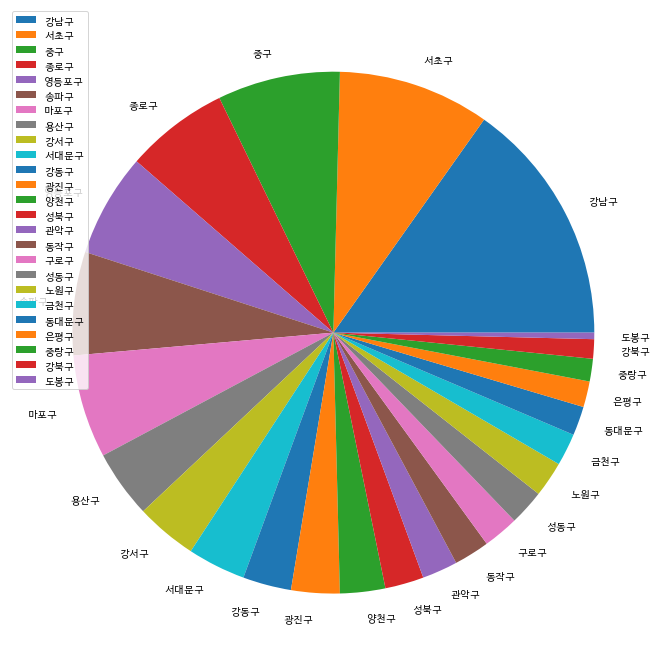

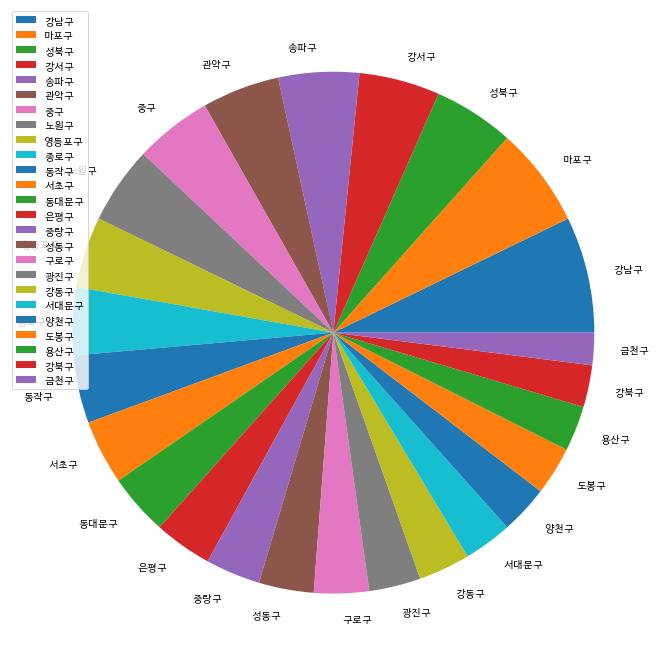

In [172]:
plt.figure(figsize=(12,12))
plt.pie(df1.Addr.value_counts(), labels=df1.Addr.value_counts().keys())
plt.legend()
plt.show()

plt.figure(figsize=(12,12))
plt.pie(df2.Addr.value_counts(), labels=df2.Addr.value_counts().keys())
plt.legend()
plt.show()

# 이디야는 굉장히 고르게 분포하고 있다.